In [8]:
from src.no_annotation.dataset import PCBDataset
from src.no_annotation.model import CustomVGG16
from src.no_annotation.utils import train, evaluate, predict_localize
from torchvision import models, transforms
import torch
import torch.nn as nn
import torch.optim as optim

root = '/home/amk/data/DeepPCB/PCBData'

In [2]:
 # Get and preprocess the data.
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.CenterCrop(224),
    transforms.ConvertImageDtype(torch.float32),
    transforms.Normalize(mean=0.5, std=0.5),
    ])

In [3]:
train_data = PCBDataset(root, 'trainval.txt', transform=data_transforms)
test_data = PCBDataset(root, 'test.txt', transform=data_transforms)

In [4]:
batch_size = 5
target_acc = 1
lr = 0.0001
epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = CustomVGG16()

model.to(device)

# Specity the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.1)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

cuda


/home/amk/anaconda3/envs/pcb_detect/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/amk/anaconda3/envs/pcb_detect/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

/home/amk/anaconda3/envs/pcb_detect/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Feature batch shape: torch.Size([5, 1, 224, 224])
Labels batch shape: torch.Size([5])


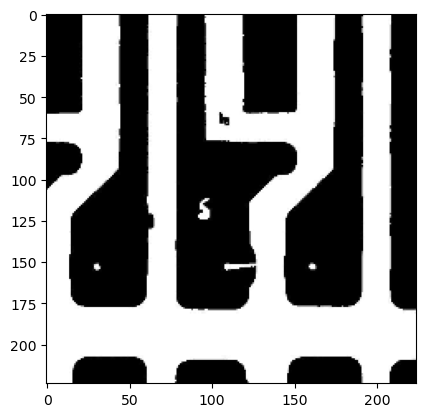

Label: 1


In [6]:
import matplotlib.pyplot as plt

# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [7]:
model = train(
    train_dataloader, model, optimizer, criterion, epochs, device, target_acc
)

Epoch 1/10: Loss = 0.4658, Accuracy = 0.7750
Epoch 2/10: Loss = 0.2771, Accuracy = 0.8700
Epoch 3/10: Loss = 0.2084, Accuracy = 0.9105
Epoch 4/10: Loss = 0.1427, Accuracy = 0.9375
Epoch 5/10: Loss = 0.1445, Accuracy = 0.9425
Epoch 6/10: Loss = 0.1021, Accuracy = 0.9585
Epoch 7/10: Loss = 0.0973, Accuracy = 0.9615
Epoch 8/10: Loss = 0.0745, Accuracy = 0.9735
Epoch 9/10: Loss = 0.0703, Accuracy = 0.9725
Epoch 10/10: Loss = 0.0646, Accuracy = 0.9755


In [8]:
model_path = '/home/amk/projects/pcb_defect_detection/weights/23.4.14_vgg16_10ep.h5'
torch.save(model, model_path)

Accuracy: 0.9310
Balanced Accuracy: 0.9310



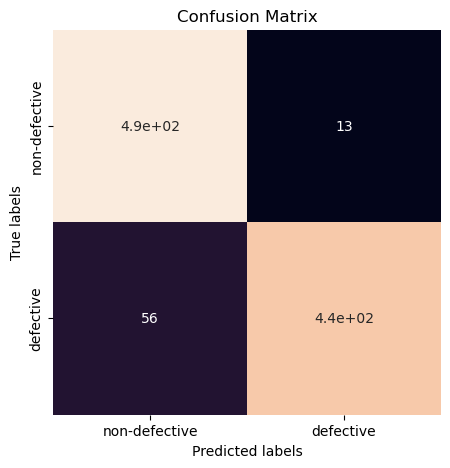

In [7]:
model_path = '/home/amk/projects/pcb_defect_detection/weights/23.4.14_vgg16_10ep.h5'
model = torch.load(model_path, map_location=device)
evaluate(model, test_dataloader, device)

In [9]:
heatmap_thres = 0.7
predict_localize(
    model, test_dataloader, device, thres=heatmap_thres, n_samples=15, show_heatmap=False
)

AttributeError: 'PCBDataset' object has no attribute 'classes'